## Stroke Prediction Model

### Prepared by: Sanjay Rajbanshi
This is a clean dataset of over 70,692 survey responses to the CDC's BRFSS2015. There are 18 feature variables and 3 target variables, Diabetes, Hypertension, and Stroke, each target variable having 2 classes. This dataset is balanced.

Further analysis is done below:

## Importing necessary libraries

Libraries are the build in machine learning models which are collection of precompiled codes that are used for specific operations. There tends to have differnt kinds of libraries in python. It made users to write and compile code in very simple and short way. 

    Pandas - Data manipulation and analysis (Row and Column)
    Numpy - Provides multidimesnional array
    Matplotlib - Graphical representatin
    Seaborn - Graphical visualization based on matplotlib
    Skit-learn - Simple and efficient tools but works with complex data. It supports Supervised and unsupervised machine                          learning algorithms.
    
 We have explore each and every libraries explained above here.

In [1]:
# Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the required data
df=pd.read_csv('diabetes_data.csv')
pd.set_option('display.max_columns',30)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

## Data Exploration and Visualization

Data visualization often results in graphical images of data or concepts, which assists making decisions (Ware, 2012). It allows to see how the data is distributed, detect outliers and allows us to convey information more effectively. It is very effective way to see represent of datas in dataset. Boxplot, Histogram, scatter-plot etc are some of graphical representation of data. In Data visualization, it shows pattern between differnt features which can help in further analyis process.

Here, in this model, i have used necessary visualization graph which represent datas. It really helps my model to achieve higher accuracy. I had a great experience using graphs and i enjoyed too much.

In [4]:
#Assessing for missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [5]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


#### It is evident from the above findings that most of the features are categorical in nature and only a few have continuous values.

In [6]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [7]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'Stroke']

************************************************************************************************


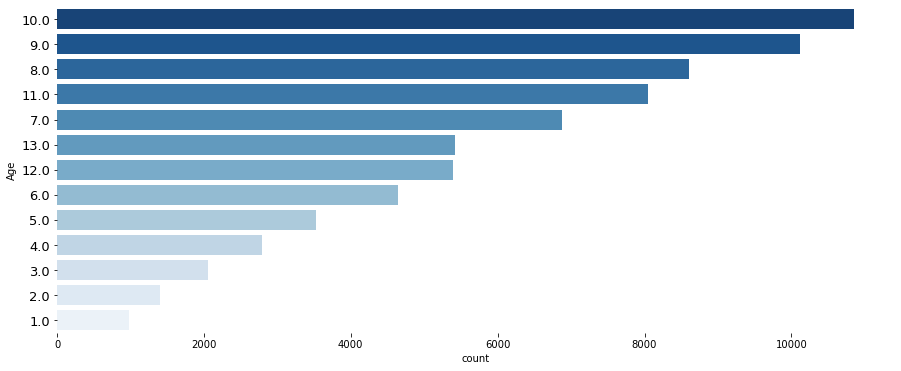

************************************************************************************************


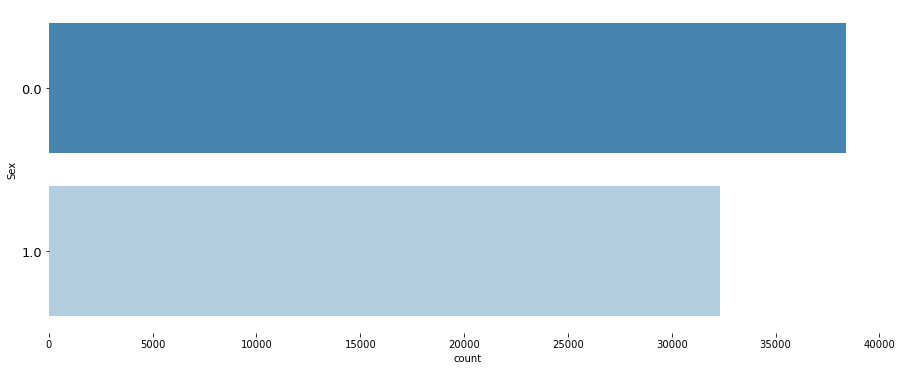

************************************************************************************************


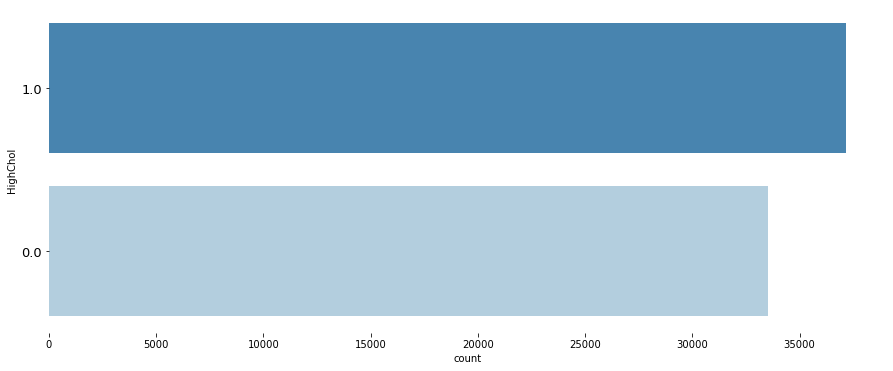

************************************************************************************************


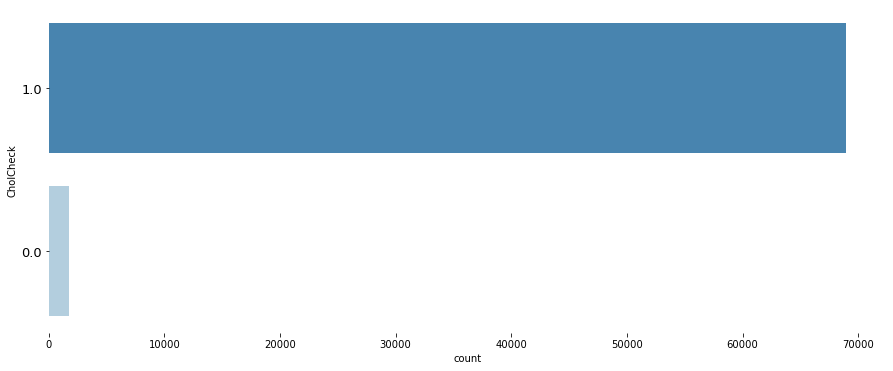

************************************************************************************************


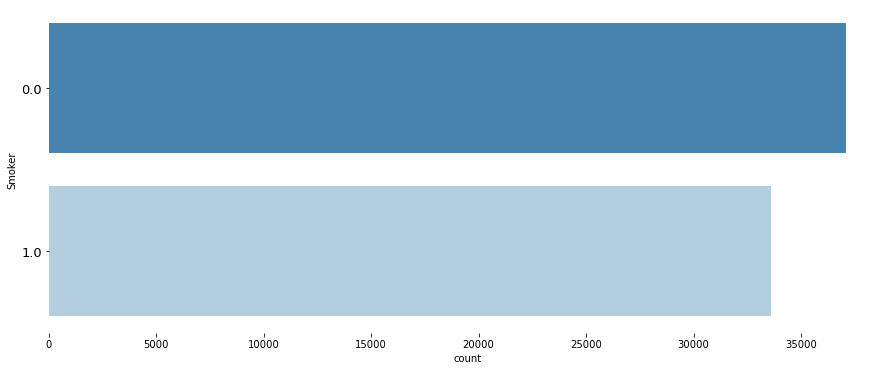

************************************************************************************************


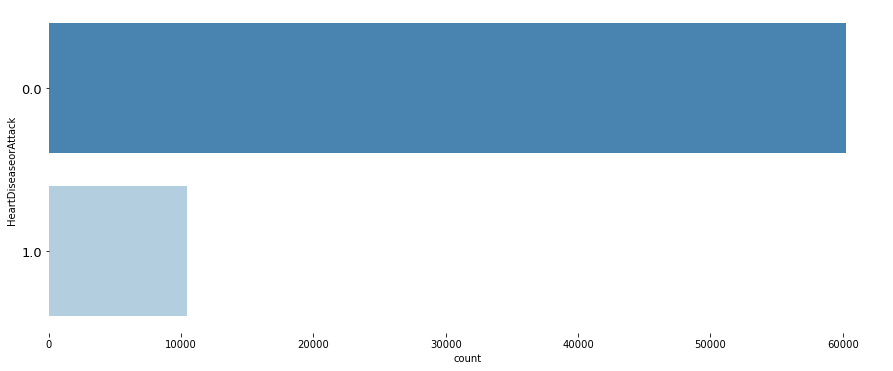

************************************************************************************************


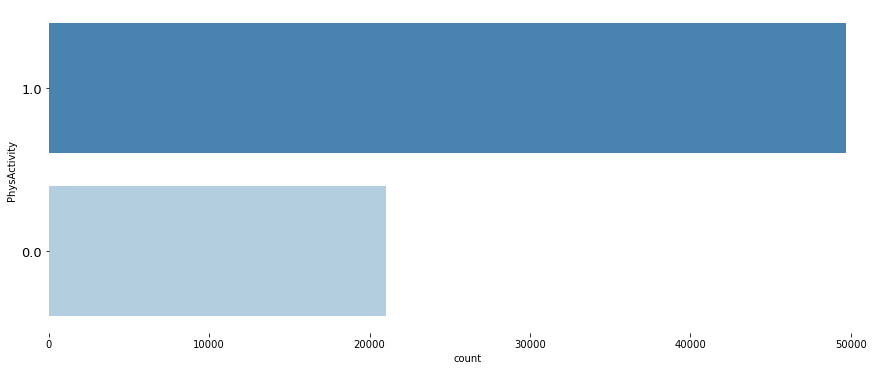

************************************************************************************************


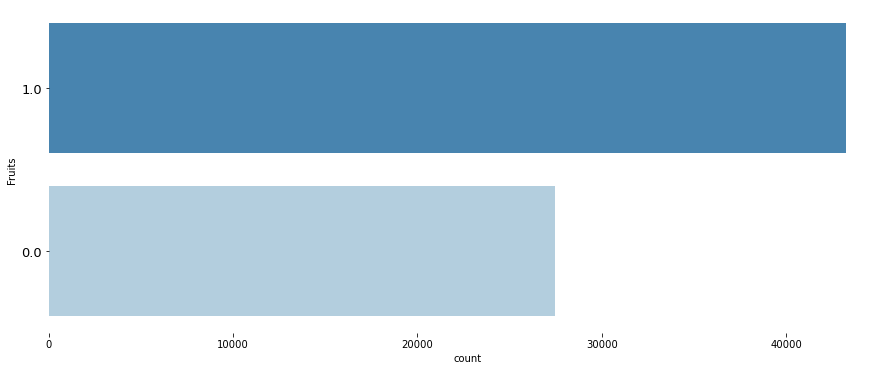

************************************************************************************************


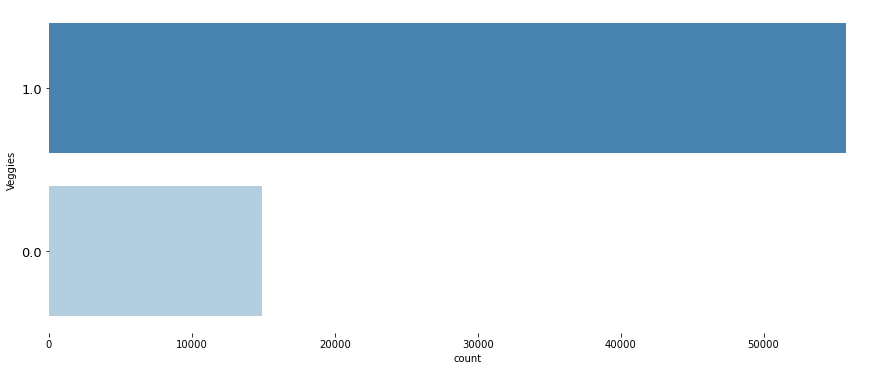

************************************************************************************************


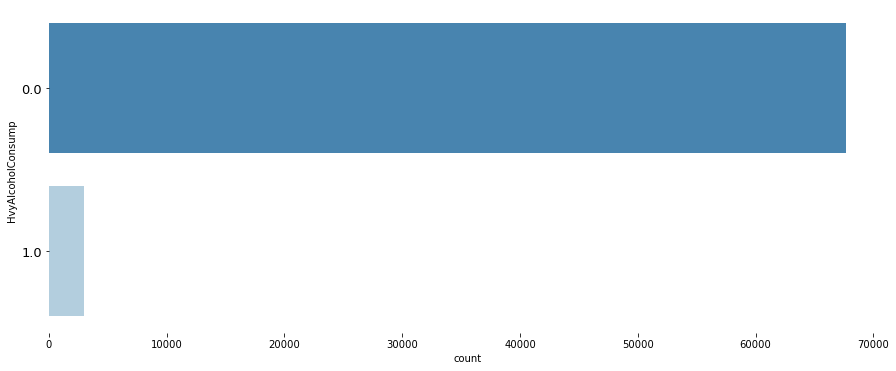

************************************************************************************************


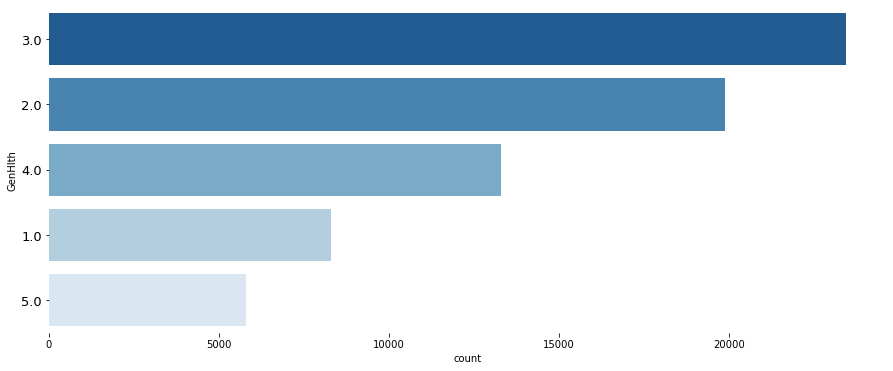

************************************************************************************************


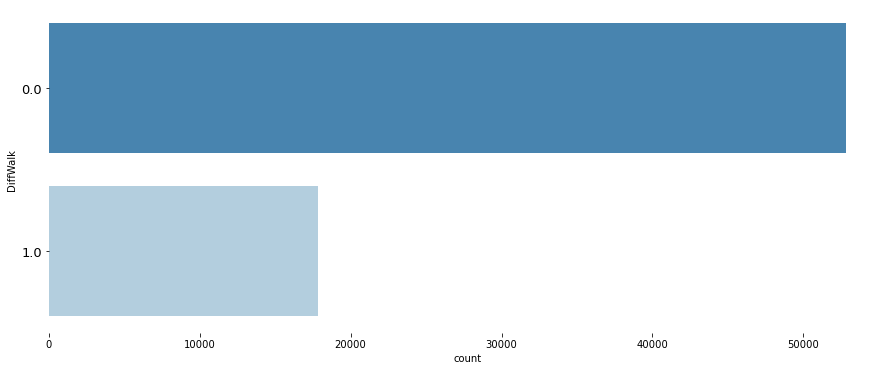

************************************************************************************************


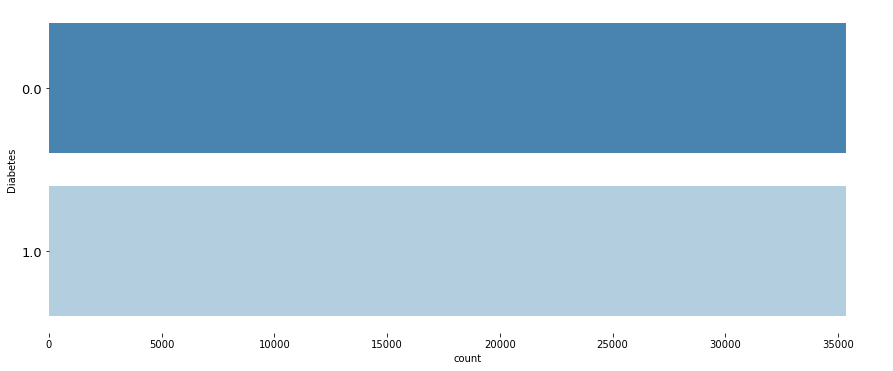

************************************************************************************************


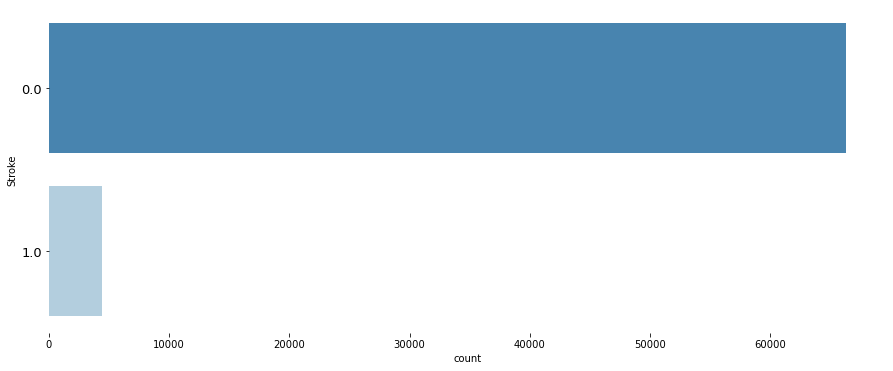

In [8]:
#Presenting the countplots for categorical features
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  print("************************************************************************************************")
  plt.box(False)
  plt.show()

#### It can be seen that features like CholCheck and HvyAlcoholConsump are heavily unbalanced and may skew or introduce bias in the model thus they will not be considered while building the model.

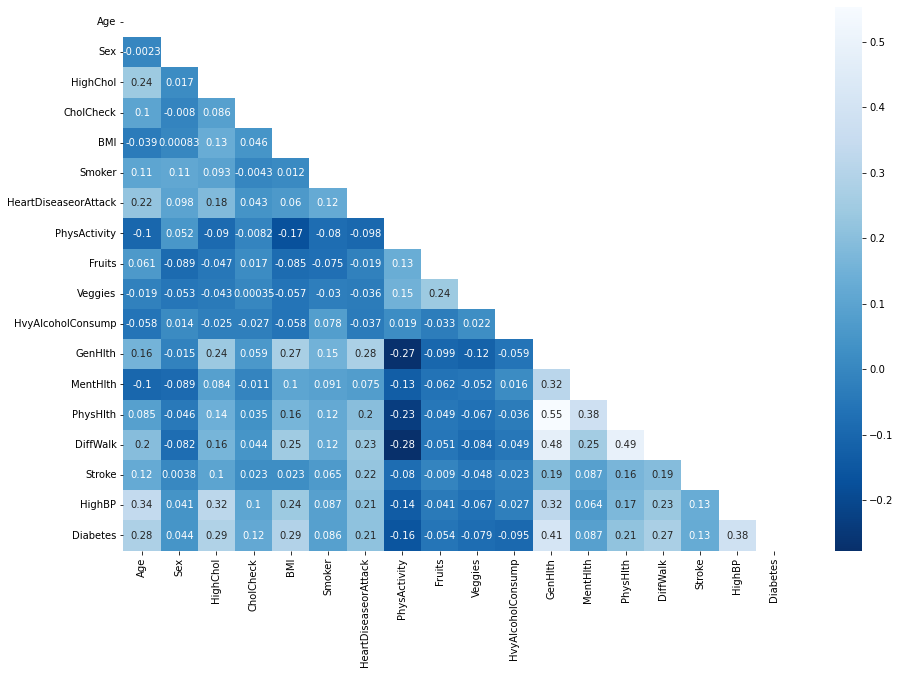

In [9]:
#Building a heatmap using correlation
plt.figure(figsize=(15,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Blues_r')
plt.show()

#### Now using this heatmap those features that might not contribute enough to the model depending on their correlation to the target(Stroke) column will be dropped from the dataset

## Feature Engineering

In [10]:
#dropping features that are not required
data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


### Splitting the features into Dependent = y and independent variables = X
Dependent variables are those variables which has the relationsip with the other varibles that changes with respect to the other varible i.e. Independent vaibales. Independent variables are those varibale which's values doesn't matter with other values but its values matter to other values.

In [11]:
#splitting the data into input data features and target 
X=data.drop('Stroke',axis=1)
y=data['Stroke']

### Scaling

In [12]:
# importing train test model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

The dataset has been splitted into trainig and testing dataset where we had passed X and y as data features.
>test_size = 0.3 means we had allocated just 20% of data from whole dataset for testing purpose. Remaining 70% will be used for training purpoess.

>Stratify = dataset['Stroke'] =y  will ensure that both the numerical values i.e., 0 and 1 has equal sets of values i.e., 50% allocated for 0 and 50% for 1 which helps to over shadowed the unersampling problem.

>random_state=105 which ensures the data of train, test split remains same all the time.

In [14]:
print(X_train.shape)
print(X_test.shape)

(49484, 10)
(21208, 10)


In [15]:
#scaling the data so that comparatively larger values do not make the model biased
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Defing a generic model

In [16]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

A python function are the set of related statements designed to perform a computational, logical, or evaluative task. The idea is to put some commonly or repeatedly done tasks together and make a function so that instead of writing the same code again and again for different inputs, we can call it through entire program.

In [17]:
#Defining a function to standardize the model testing process
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    score=model.score(X_test_scaled,y_test)
    print('**********************Accuracy************************')
    print("Accuracy : {}".format(score))
    
    print('**********************Classification Report************************')
    print(classification_report(y_test,y_pred))
    
    print('**********************Confusion Matrix************************')
    cm=confusion_matrix(y_test,y_pred)    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

# Testing different Models

In [18]:
# importing all necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#### Confusion Matrix
A confusion matrix also known as error matrix is a specific table layout that allows visualization of the algorithm performance, and is mostly used in supervised learning(Haghighi,2018).

### Description of Confusion Matrix

#### Symbols in confusion matrix
    1.True Negative - TN (Truth - 0  , predicts - 1)
    2.False Positive - FP (Truth - 0 , predicts - 1)
    3.False Negative - FN (Truth - 1 , predicts -0)
    4.True Positvie - TP  (Truth - 1 , predicts - 1)


#### Formulas
Precision:  Accuracy of positive predictions
$$Precision (for 0 - Bad Quality)= \frac{TN}{TN+FN}$$ 

$$Precision (for 1 - Good Quality)=\frac{TP}{TP+FP} $$

Recall: Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.
$$Recall(for 0 - Bad Quality)=\frac{TN}{TN+FP}$$

$$Recall(for 1 - Good Quality)=\frac{TP}{TP+FN}$$

F1 score: F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
$$F1-score = \frac{(2*Precision*Recall)}{Precision+Recall}$$

In [19]:
import warnings                     #Stopping warning sign
warnings.filterwarnings("ignore")

#### Logistic Regression

Logistic Regression (LR) is one of the most important statistical and datamining techniques employed by statisticians and researchers for the analysis andclassiﬁcation of binary and proportional response data sets(Maalouf,2011).
I uses a Activation function called Sigmoid which converts every data in range between (0-1).

#### Example:
Formula: 
$$Z=\frac{1}{1+e^z}$$

e=euler's number = 2.718

**********************Accuracy************************
Accuracy : 0.9376650320633723
**********************Classification Report************************
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.33      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.64      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208

**********************Confusion Matrix************************


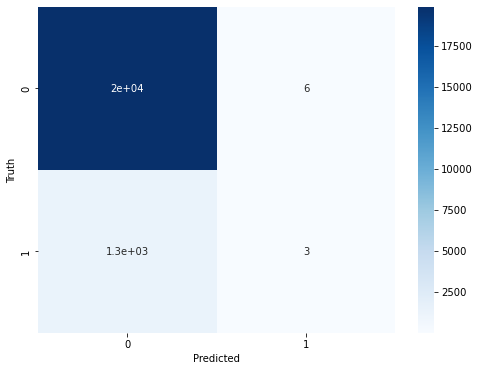

In [20]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg_cv)

#### Decision Tree

According to (LU, 2015), Decision tree methodology is a commonly used data mining method for establishing classification systems based on multiple covariates or for developing prediction algorithms for a target variable. This method classifies a population into branch-like segments that construct an inverted tree with a root node, internal nodes, and leaf nodes. The algorithm is non-parametric and can efficiently deal with large, complicated datasets without imposing a complicated parametric structure. When the sample size is large enough, study data can be divided into training and validation datasets. Using the training dataset to build a decision tree model and a validation dataset to decide on the appropriate tree size needed to achieve the optimal final model.

#### Example:
Formula:$$\frac{(x_{i}-\bar{x})}{std.}$$

$$E(s)=\sum\limits_{i=1}{-p_{i}}{log_{2}}{p_{i}}$$

In [21]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [22]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Accuracy for our training dataset with tuning is : 93.78%


**********************Accuracy************************
Accuracy : 0.9378064881176914
**********************Classification Report************************
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.00      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208

**********************Confusion Matrix************************


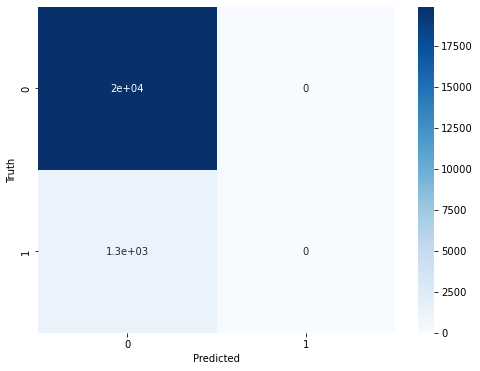

In [23]:
model_train_test(DecisionTreeClassifier(ccp_alpha=0.1,criterion='gini',max_depth=5,max_features='auto'))

#### Random Forest Classifier

A random forest (RF) classifier is an ensemble classifier that produces multiple decision trees, using a randomly selected subset of training samples and variables. This classifier has become popular within the remote sensing community due to the accuracy of its classifications(Mariana Belgiua and Lucian Drăguţ, 2016).

> For our model which is classification type, we should use Entropy like we use in Decision Tree classifier.

### Formula

$$Entropy=\sum\limits_{i=1}^{c}-f_{i}log(f_{i})$$

$$f_{i} is the frequency of label "i" at a node and c is the units of unique labels.$$

**********************Accuracy************************
Accuracy : 0.9264900037721614
**********************Classification Report************************
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     19889
         1.0       0.21      0.06      0.10      1319

    accuracy                           0.93     21208
   macro avg       0.57      0.52      0.53     21208
weighted avg       0.89      0.93      0.91     21208

**********************Confusion Matrix************************


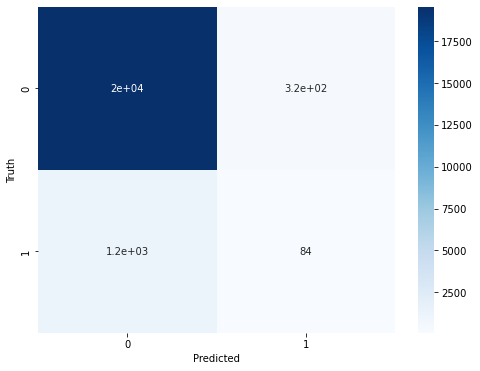

In [24]:
rf = RandomForestClassifier()
model_train_test(rf)

#### GAUSSIAN NAIVE BAYES

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task based on the Bayes theorem. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

Gaussian Naive Bayes: When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

#### Formula: Naive Bayes 
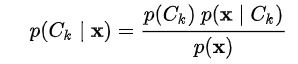

#### Formula : Gaussian Naive Bayes
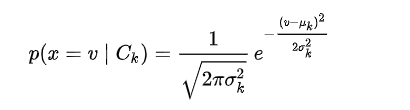

**********************Accuracy************************
Accuracy : 0.8476046774801962
**********************Classification Report************************
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     19889
         1.0       0.20      0.48      0.28      1319

    accuracy                           0.85     21208
   macro avg       0.58      0.68      0.60     21208
weighted avg       0.91      0.85      0.88     21208

**********************Confusion Matrix************************


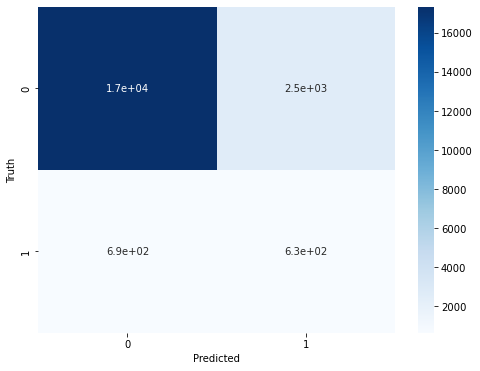

In [25]:
gnb=GaussianNB()
model_train_test(gnb)

#### BERNOULLI NAIVE BAYES

In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence features are used rather than term frequencies. If x_{i} is a boolean expressing the occurrence or absence of the i'th term from the vocabulary, then the likelihood of a document given a class C_{k} is given by:

### Formula:
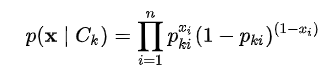

where p_{ki}} is the probability of class C_{k} generating the term x_{i}.

**********************Accuracy************************
Accuracy : 0.8903244058845718
**********************Classification Report************************
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     19889
         1.0       0.22      0.31      0.26      1319

    accuracy                           0.89     21208
   macro avg       0.59      0.62      0.60     21208
weighted avg       0.91      0.89      0.90     21208

**********************Confusion Matrix************************


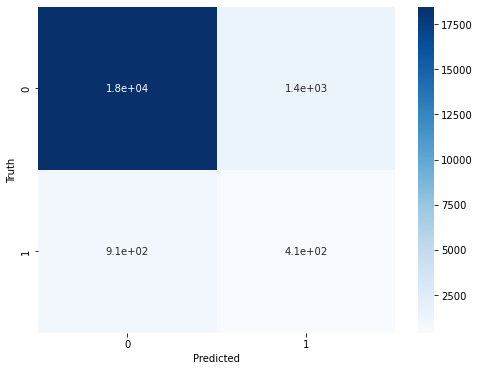

In [26]:
bnb=BernoulliNB()
model_train_test(bnb)

## After testing differnt models, Logistic Regerssion, Decision Tree Classifier and Random Forest CLassifer altogether perfroms very well.